__This notebook show the model evaludation results of the models using Morgan2 fingerprint__
- Use the diversity-data environment

In [ ]:
import sys
sys.path.append("../../src/common")
from pharmacy_common import PharmacyCommon
common = PharmacyCommon()

import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib as plt


# Read the data

In [4]:
train_test_path = "../../data/train_test_data/XO_train_test_data.xlsx"
train_dataset = pd.read_excel(train_test_path, sheet_name='train_dataset')
test_dataset = pd.read_excel(train_test_path, sheet_name='test_dataset')
validation_dataset = pd.read_excel(train_test_path, sheet_name='validation_dataset')

In [5]:
all_dataset = pd.concat([train_dataset, test_dataset, validation_dataset], axis=0)

In [6]:
print(len(train_dataset), len(test_dataset), len(validation_dataset), len(all_dataset))

337 73 73 483


In [7]:
train_dataset.head()

,CID,SMILES,IC50(nM),Type,substructure
0,145967694,CC1=CC2=C(C=C1)N=C(O2)/C(=N/O)/CC3=CC=CC=C3,17500.0,inactive,7
1,76329670,CC1(C=CC2=CC(=C(C=C2O1)O)C(=O)/C=C/C3=CC(=C(C=...,1800.0,active,16
2,5320686,C1=CC(=CC=C1/C=C/C(=O)OC[C@@H]2[C@H]([C@@H]([C...,100000.0,inactive,6
3,155903284,C1=CC(=CC=C1C2=NC=NN2)NC(=O)C3C(NC(=O)NC3=O)O,1400.0,active,1
4,137648214,CCCCC1=NN2C(=N1)C3=C(NC2=O)NN=C3,529.0,active,9


# Tanimoto coefficient

### Functions

In [7]:
def calculate_tanimoto_coefficient(array1, array2):
    if len(array1) != len(array2):
        raise ValueError("The arrays must have the same length.")
    
    # Calculate the Tanimoto coefficient
    intersection = sum(a and b for a, b in zip(array1, array2))
    union = sum(a or b for a, b in zip(array1, array2))
    
    if union == 0:  # Handle the case when both arrays are all zeros
        return 0.0
    else:
        tanimoto_coefficient = intersection / union
        return tanimoto_coefficient
    
def calculate_tc_among_dataset(encoded_dataset):
    size = len(encoded_dataset)
    result_matrix = np.zeros((size, size))
    for i in range(0, size):
        for j in range(i, size):
            result_matrix[i][j] = calculate_tanimoto_coefficient(encoded_dataset[i], encoded_dataset[j])
    return result_matrix

def set_zero_diagonal(numpy_matrix):
    col_idx = 0
    for i in range(0, numpy_matrix.shape[0]):
        numpy_matrix[i][col_idx] = 0
        col_idx+=1
    return numpy_matrix

In [9]:
all_dataset_morgan2 = common.gen_ecfp4_fpts(all_dataset['SMILES'], 1024)
all_dataset_maccs = common.gen_maccs_fpts(all_dataset['SMILES'])

Progress:   0%|          | 0/483 [00:00<?, ?it/s][16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:44] DEPRECATION WARNING: please use MorganGenerator
[16:41:

## Working with all dataset

### Morgan2

In [ ]:
all_dataset_morgan2_tc = calculate_tc_among_dataset(all_dataset_morgan2)

In [11]:
all_dataset_morgan2_tc.shape

(483, 483)

<Axes: >

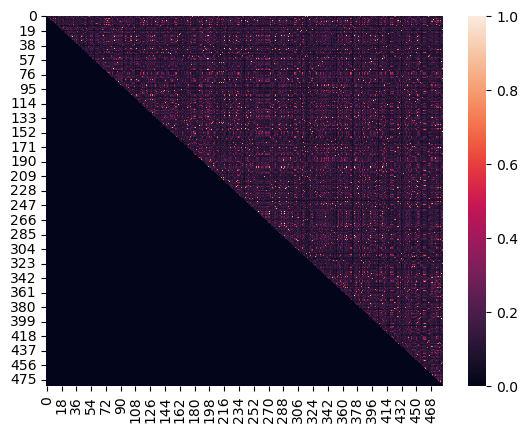

In [12]:
all_dataset_morgan2_tc = set_zero_diagonal(numpy_matrix=all_dataset_morgan2_tc)
sns.heatmap(all_dataset_morgan2_tc)

In [13]:
all_dataset_morgan2_tc_df = pd.DataFrame(all_dataset_morgan2_tc)
all_dataset_morgan2_tc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,473,474,475,476,477,478,479,480,481,482
0,0.0,0.121622,0.097826,0.064935,0.097222,0.146341,0.070423,0.098765,0.094595,0.103896,...,0.141026,0.078947,0.119403,0.092105,0.079545,0.073529,0.076923,0.128205,0.136364,0.121622
1,0.0,0.000000,0.191011,0.115385,0.076923,0.076087,0.065789,0.056180,0.146667,0.139241,...,0.132530,0.129870,0.212121,0.086420,0.075269,0.040000,0.072917,0.207792,0.111111,0.100000
2,0.0,0.000000,0.000000,0.129032,0.085106,0.103774,0.076087,0.142857,0.118280,0.173913,...,0.142857,0.141304,0.195122,0.115789,0.113208,0.090909,0.110092,0.144330,0.088889,0.218391
3,0.0,0.000000,0.000000,0.000000,0.121622,0.209877,0.111111,0.162500,0.517857,0.085366,...,0.134146,0.592593,0.144928,0.242857,0.237500,0.115942,0.228916,0.095238,0.112676,0.101266
4,0.0,0.000000,0.000000,0.000000,0.000000,0.130952,0.203125,0.125000,0.093333,0.131579,...,0.084337,0.106667,0.085714,0.105263,0.116279,0.104478,0.125000,0.141026,0.101449,0.120000


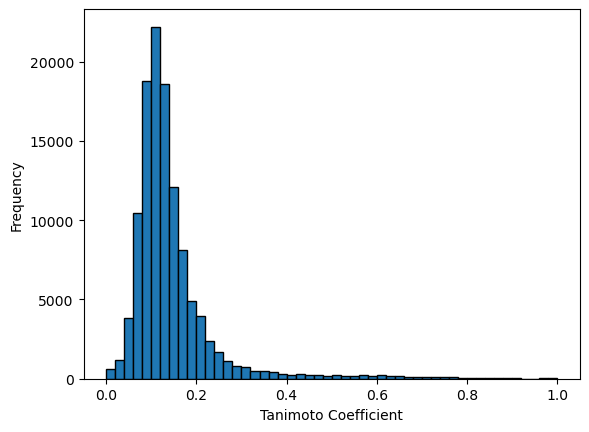

In [ ]:
matrix_size = len(all_dataset_morgan2_tc[0])  
flattened_matrix = all_dataset_morgan2_tc[np.triu_indices(matrix_size)]

plt.hist(flattened_matrix, bins=50, edgecolor='black')
plt.xlabel('Tanimoto Coefficient')
plt.ylabel('Frequency')
plt.show()

In [ ]:
len(flattened_matrix)

116886

In [ ]:
len(flattened_matrix[flattened_matrix <0.4])

113029

In [ ]:
plt.savefig("../../results/diversity_analysis/Tc_ECFP4_distribution.png")

<Figure size 640x480 with 0 Axes>